In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
data= pd.read_csv('diabetes.csv')

# Summary Statistics: 

In [3]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* Pregnancies&Insulin: is positively skewed, as the median (50th percentile) is less than the mean
* SkinThickness: is close to symmetric, as the median (50th percentile) is close to the mean.
* remainig features: seems to be relatively symmetric, as the median (50th percentile) is close to the mean.

### To handle missing values, will create a copy of the original DataFrame named 'data_cleaned' to preserve the integrity of the original data. Then, will replace the zeros in the columns 'age', 'Insulin', 'blood_pressure', and 'blood_sugar' with NaN (representing missing values) using NumPy's np.nan

In [6]:
data_cleaned = data.copy()

In [7]:
data_cleaned[data_cleaned == 0] = np.nan

In [8]:
data_cleaned['Outcome'] = data_cleaned['Outcome'].fillna(0)

In [9]:
data_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [10]:
data_cleaned.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

* Pregnancies: 111 missing values
* Glucose: 5 missing values
* BloodPressure: 35 missing values
* SkinThickness: 227 missing values
* Insulin: 374 missing values
* BMI: 11 missing values
* DiabetesPedigreeFunction & Age : 0 missing values
#### Replace the missing values in each numerical feature with the calculated mean or median, respectively.


# Data Visualization:

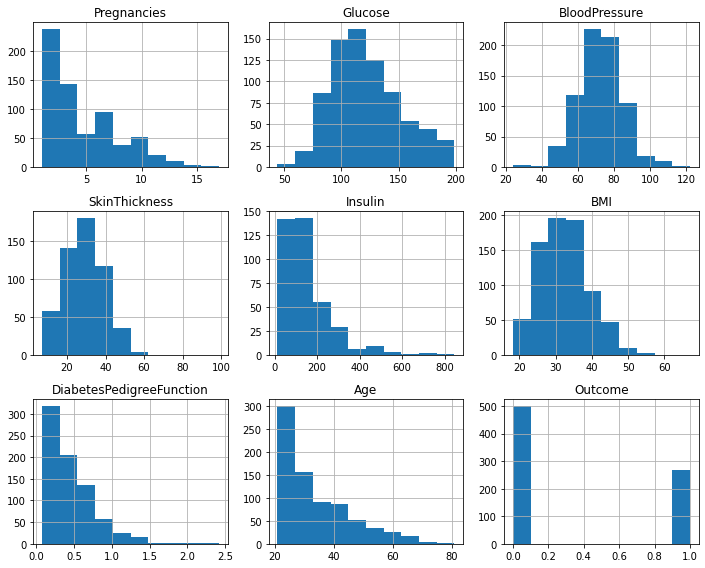

In [11]:
data_cleaned.hist(figsize=(10, 8), bins=10)
plt.tight_layout()
plt.show()




### Based on the data distribution, will treat the missing values differently for the features. For the skewed features ('Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', and 'Age'), will use median imputation. For features with a normal distribution, will use mean imputation. This approach aligns with the characteristics of each feature's data distribution and maintains data integrity during imputation.

In [12]:
data_cleaned['Pregnancies'].fillna(data_cleaned['Pregnancies'].median(), inplace= True)
data_cleaned['Insulin'].fillna(data_cleaned['Insulin'].median(), inplace = True)

In [13]:
column_mean = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
data_cleaned[column_mean] = data_cleaned[column_mean].fillna(data_cleaned[column_mean].mean())

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Correlation Analysis:

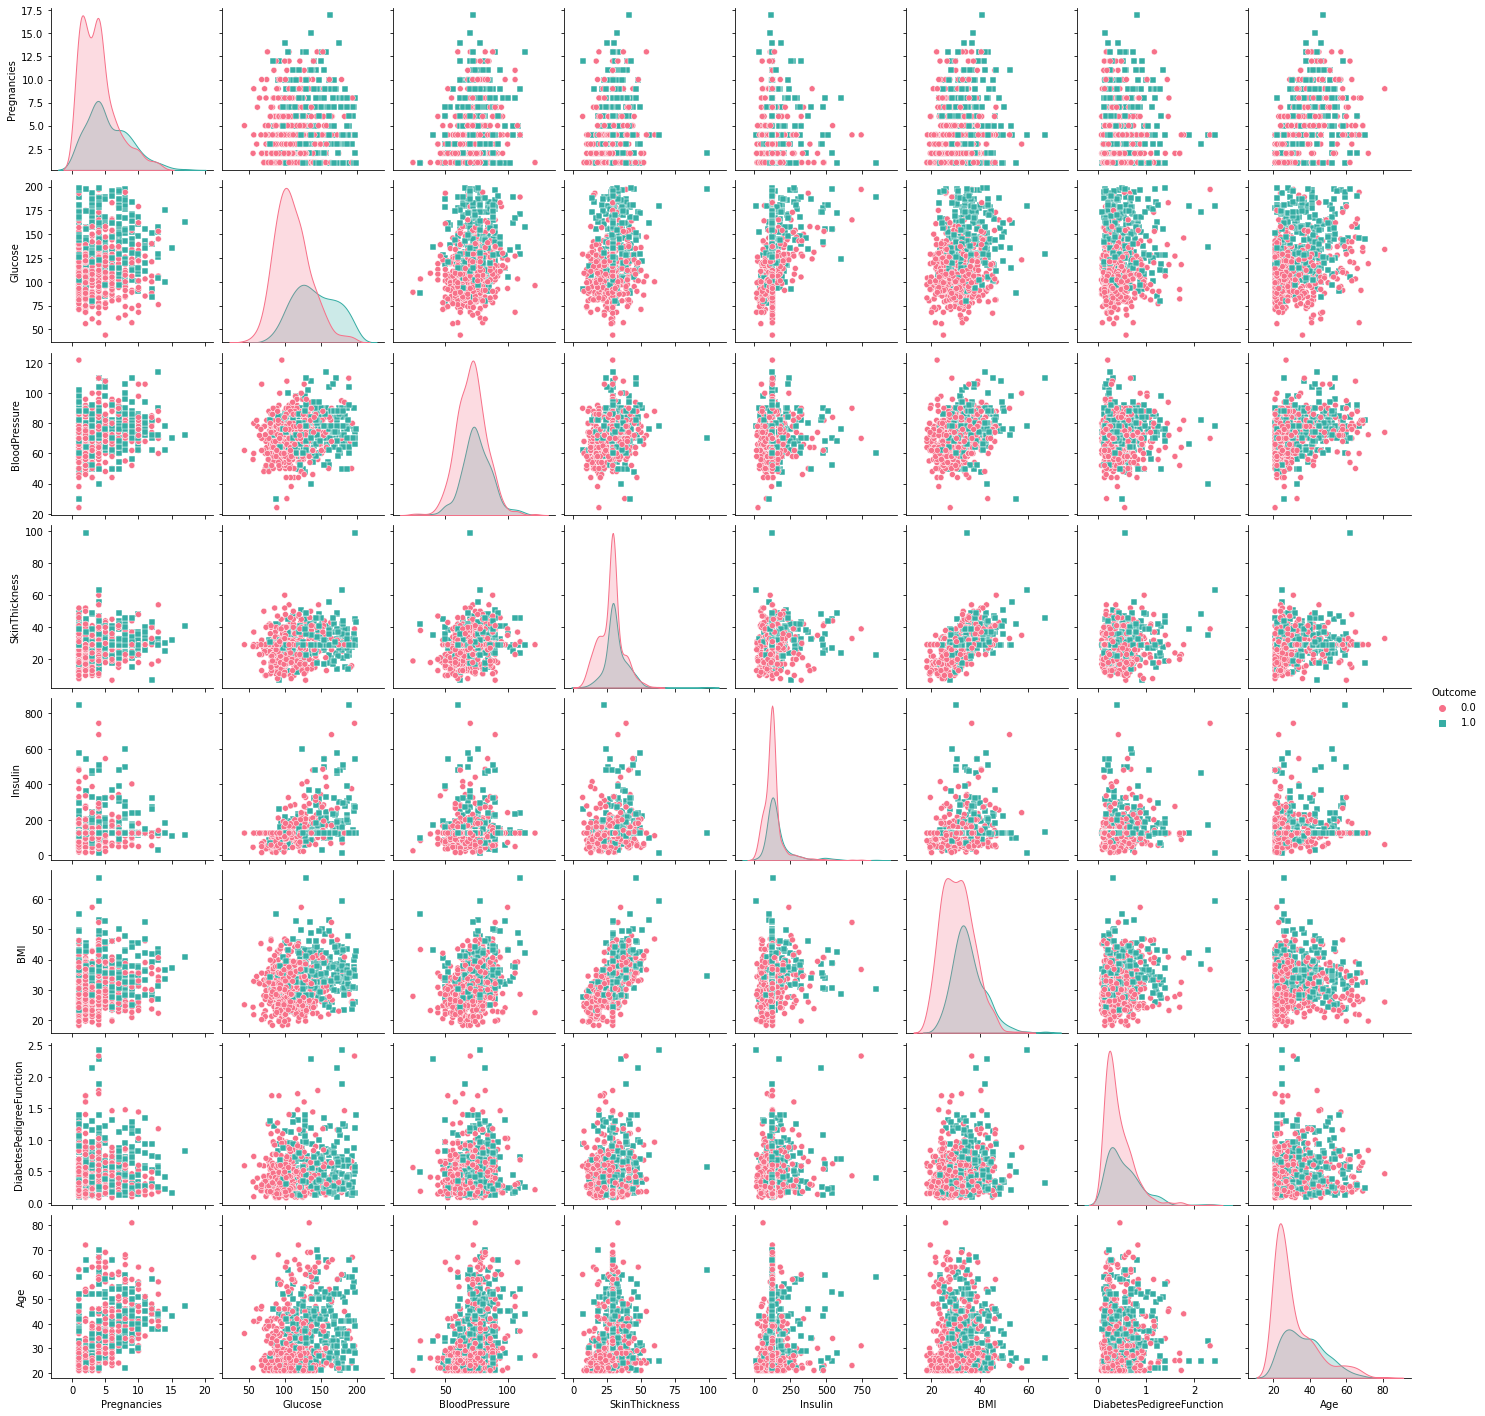

In [15]:
sns.pairplot(data_cleaned, diag_kind='kde', hue='Outcome', markers=['o', 's'], palette='husl')
plt.show()

### 1.Correlation between BMI and Skin Thickness:

* After analyzing the pair plot, it appears that there is a noticeable correlation between the 'BMI' (Body Mass Index) and 'SkinThickness' features. The scatter plot between these two features shows a discernible pattern, indicating a potential relationship.
### 2.Inability to Distinguish Outcome Classes:

* Upon examining all the scatter plots in the pair plot, it seems that none of the feature pairs can clearly distinguish between the two classes of the 'Outcome' variable (likely to have diabetes and not likely to have diabetes).
* The data points in the scatter plots appear to overlap significantly for both classes, making it challenging to visually separate the classes based on the numerical features.

Text(0.5, 1.0, 'Correlation map')

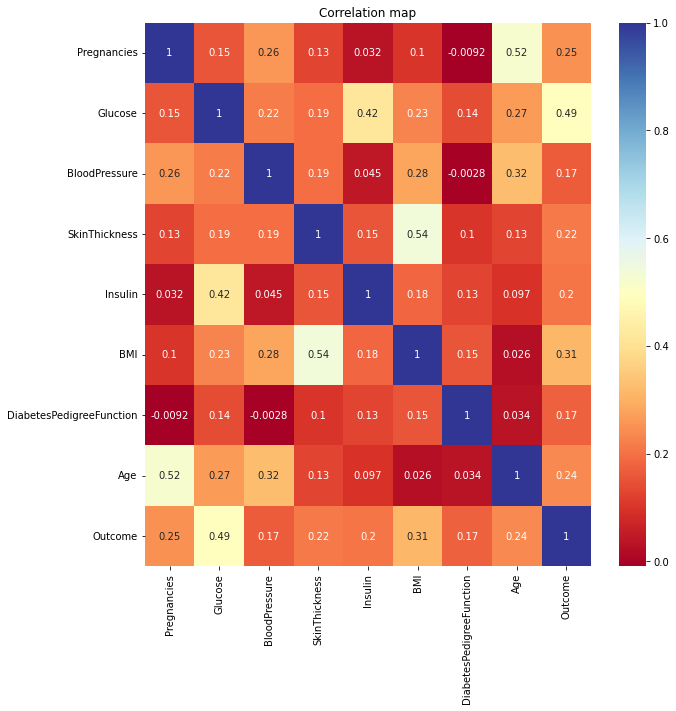

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data_cleaned.corr(),annot=True,cmap='RdYlBu');
plt.title('Correlation map')

### Interpretation:

* The 'Glucose' feature has the highest positive correlation with 'Outcome' (0.492928), suggesting that higher glucose levels are associated with a higher likelihood of having diabetes.
* 'BMI' (0.311924) also shows a positive correlation, indicating that higher BMI values are somewhat correlated with a higher likelihood of diabetes.
* Other features such as 'Pregnancies', 'Age', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', and 'BloodPressure' show weaker positive correlations, suggesting some degree of association but not as strong as 'Glucose' and 'BMI'.

# Data Balancing

In [17]:
X= data_cleaned.iloc[:,:-1]

In [18]:
y= data.Outcome

In [19]:
y.value_counts()*100/data_cleaned.shape[0]

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

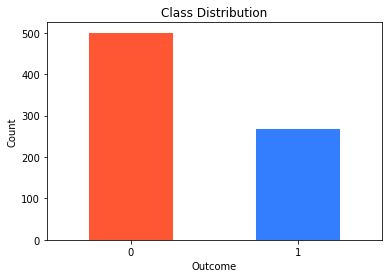

In [20]:
y.value_counts().plot(kind='bar', color=['#FF5733', '#337EFF'])
plt.xticks(rotation=0)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


### The dataset exhibits class imbalance, where the target variable 'Outcome' has two classes: '0' and '1'. Class '0' represents 500 instances, while class '1' represents only 270 instances. This significant difference in the number of instances between the classes indicates an imbalanced distribution. In such scenarios, class imbalance can affect the performance of machine learning models, particularly those sensitive to class proportions during training. To address this issue, data balancing techniques like oversampling, undersampling, or using SMOTE can be applied to ensure a more balanced representation of both classes during model training.

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=0)
st= StandardScaler()



In [71]:
X_train_st= st.fit_transform(X_train)
X_test_st= st.fit_transform(X_test)

In [72]:
from imblearn.over_sampling import SMOTE
SM= SMOTE()
X_train_sm,y_train_sm= SM.fit_resample(X,y)

In [73]:
X_train_sm.shape

(1000, 8)

In [74]:
y_train_sm.shape

(1000,)

# Data Preprocessing:

In [145]:
X_train,X_test,Y_train,Y_test= train_test_split(X_train_sm,y_train_sm,test_size=0.25, random_state=0)

In [146]:
X_train_std=st.fit_transform(X_train)
X_test_std=st.fit_transform(X_test)

In [147]:
X_train_std.shape

(750, 8)

In [148]:
X_test_std.shape

(250, 8)


### Aim to construct and assess the performance of multiple popular classification models using the training dataset. Subsequently, will compare their performances on the test dataset. The models considered for evaluation are:

 ####   1. XGBoost
 ####  2. Logistic Regression
 ####  3. Support Vector Machine (SVM)
 ####  4. K-Nearest Neighbors (KNN)
 ####  5. Naive Bayes
 ####   6. Decision Tree
 ####   7. Random Forest Classifier
### By conducting this comparison, will determine which model exhibits the best generalization to unseen data, ensuring optimal model selection for future predictions.

In [149]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Model1. Xgboost

In [150]:

import xgboost as xgb

model1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model1.fit(X_train_std, Y_train)

predict1 = model1.predict(X_test_std)

In [151]:
score_xgb = round(accuracy_score(predict1,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 82.0 %


In [152]:
print(confusion_matrix(Y_test,predict1))

[[ 92  34]
 [ 11 113]]


In [153]:
print(classification_report(Y_test,predict1))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       126
           1       0.77      0.91      0.83       124

    accuracy                           0.82       250
   macro avg       0.83      0.82      0.82       250
weighted avg       0.83      0.82      0.82       250



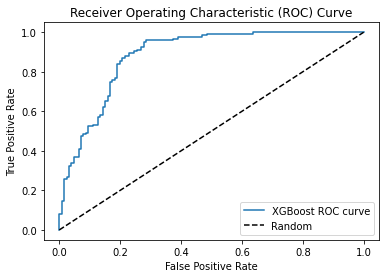

In [154]:
from sklearn.metrics import roc_curve,roc_auc_score
probabilities1 = model1.predict_proba(X_test_std)
predicted_probs1 = probabilities1[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, predicted_probs1)
plt.plot(fpr, tpr, label='XGBoost ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Model2. Logistic Regression

In [155]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()

model2.fit(X_train_std,Y_train)

predict2 = model2.predict(X_test_std)

score_lr = round(accuracy_score(predict2,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 78.0 %


In [156]:
print(confusion_matrix(Y_test,predict2))

[[100  26]
 [ 29  95]]


In [157]:
print(classification_report(Y_test,predict2))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       126
           1       0.79      0.77      0.78       124

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250



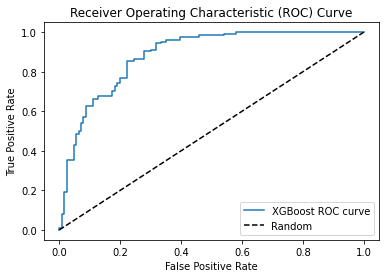

In [158]:
probabilities2 = model2.predict_proba(X_test_std)
predicted_probs2 = probabilities2[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, predicted_probs2)
plt.plot(fpr, tpr, label='XGBoost ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Model3. SVM

In [159]:
from sklearn import svm

model3 = svm.SVC(kernel='linear')

model3.fit(X_train_std, Y_train)

predict3= model3.predict(X_test_std)

score_svm = round(accuracy_score(predict3,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 78.0 %


In [160]:
print(confusion_matrix(Y_test,predict3))

[[98 28]
 [27 97]]


In [161]:
print(classification_report(Y_test,predict3))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       126
           1       0.78      0.78      0.78       124

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250



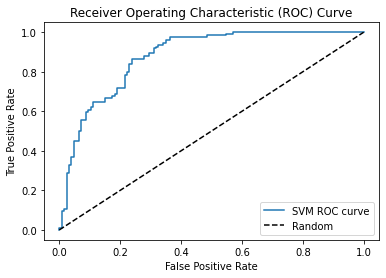

In [162]:
probabilities3 = model3.decision_function(X_test_std)
fpr, tpr, thresholds = roc_curve(Y_test, probabilities3)
auc_score = roc_auc_score(Y_test, probabilities3)
plt.plot(fpr, tpr, label='SVM ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Model4. k-nearest neighbors (KNN) 

In [163]:
from sklearn.neighbors import KNeighborsClassifier

model4 = KNeighborsClassifier()
model4.fit(X_train_std, Y_train)

predict4 = model4.predict(X_test_std)


score_knn = round(accuracy_score(predict4,Y_test)*100,2)

print("The accuracy score achieved using KNN Classifier is: "+str(score_knn)+" %")

The accuracy score achieved using KNN Classifier is: 81.2 %


In [164]:
print(confusion_matrix(Y_test,predict4))

[[ 92  34]
 [ 13 111]]


In [165]:
print(classification_report(Y_test,predict4))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       126
           1       0.77      0.90      0.83       124

    accuracy                           0.81       250
   macro avg       0.82      0.81      0.81       250
weighted avg       0.82      0.81      0.81       250



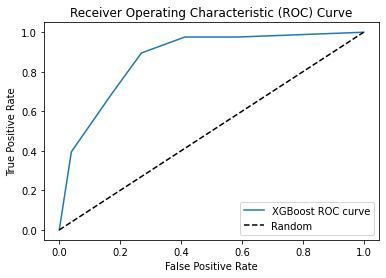

In [166]:
probabilities4= model4.predict_proba(X_test_std)
predicted_probs4= probabilities4[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, predicted_probs4)
plt.plot(fpr, tpr, label='XGBoost ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Model5. Naive Bayes

In [167]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()
model5.fit(X_train_std, Y_train)

predict5= model5.predict(X_test_std)


score_knn = round(accuracy_score(predict5,Y_test)*100,2)

print("The accuracy score achieved using Naives Bayes Classifier is: "+str(score_knn)+" %")

The accuracy score achieved using Naives Bayes Classifier is: 78.0 %


In [168]:
print(confusion_matrix(Y_test,predict5))

[[104  22]
 [ 33  91]]


In [169]:
print(classification_report(Y_test,predict5))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       126
           1       0.81      0.73      0.77       124

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250



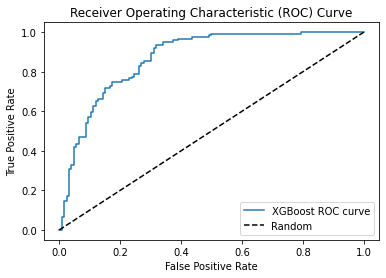

In [170]:
probabilities5= model5.predict_proba(X_test_std)
predicted_probs5 = probabilities5[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, predicted_probs5)
plt.plot(fpr, tpr, label='XGBoost ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Model6. Decision Tree

In [171]:
from sklearn.tree import DecisionTreeClassifier
model6= DecisionTreeClassifier(random_state=42)
model6.fit(X_train_std, Y_train)

predict6= model6.predict(X_test_std)


score_knn = round(accuracy_score(predict6,Y_test)*100,2)

print("The accuracy score achieved using  Decision Trees is: "+str(score_knn)+" %")

The accuracy score achieved using  Decision Trees is: 75.6 %


In [172]:
print(confusion_matrix(Y_test,predict6))

[[95 31]
 [30 94]]


In [173]:
print(classification_report(Y_test,predict6))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       126
           1       0.75      0.76      0.76       124

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250



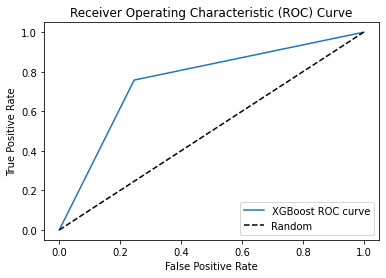

In [174]:
probabilities6 = model6.predict_proba(X_test_std)
predicted_probs6 = probabilities6[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, predicted_probs6)
plt.plot(fpr, tpr, label='XGBoost ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Model7. Random Forest Classifier

In [175]:
from sklearn.ensemble import RandomForestClassifier
model7=RandomForestClassifier(random_state=42)

model7.fit(X_train_std, Y_train)

predict7= model7.predict(X_test_std)

score_knn = round(accuracy_score(predict7,Y_test)*100,2)

print("The accuracy score achieved using  Decision Trees is: "+str(score_knn)+" %")

The accuracy score achieved using  Decision Trees is: 86.4 %


In [176]:
print(confusion_matrix(Y_test,predict7))

[[103  23]
 [ 11 113]]


In [177]:
print(classification_report(Y_test,predict7))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       126
           1       0.83      0.91      0.87       124

    accuracy                           0.86       250
   macro avg       0.87      0.86      0.86       250
weighted avg       0.87      0.86      0.86       250



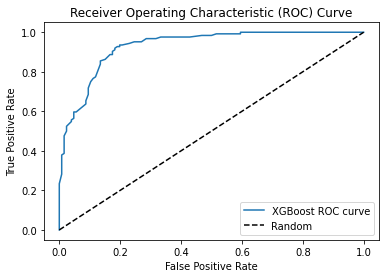

In [178]:
probabilities7 = model7.predict_proba(X_test_std)
predicted_probs7 = probabilities7[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, predicted_probs7)
plt.plot(fpr, tpr, label='XGBoost ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [185]:
model_names = ['XGBoost', 'Logistic Regression', 'SVM', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest']


models = [model1, model2, model3, model4, model5, model6, model7]

In [189]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Create an empty list to store model summary information
summary = []

for name, model in zip(model_names, models):
    
    predictions = model.predict(X_test_std)
        
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    auc = roc_auc_score(Y_test, predictions)
    
    # Append model summary to the list
    summary.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'AUC': auc})

# Create a DataFrame from the summary list
summary_df = pd.DataFrame(summary)


summary_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,XGBoost,0.820,0.768707,0.911290,0.833948,0.820725
1,Logistic Regression,0.780,0.785124,0.766129,0.775510,0.779890
2,SVM,0.780,0.776000,0.782258,0.779116,0.780018
3,k-nearest neighbors (KNN),0.812,0.765517,0.895161,0.825279,0.812660
4,Naive Bayes,0.780,0.805310,0.733871,0.767932,0.779634
5,Decision Tree,0.756,0.752000,0.758065,0.755020,0.756016
6,Random Forest,0.864,0.830882,0.911290,0.869231,0.864375


# Conclusions:
* Model Performance: We trained and tested seven popular classification models, namely XGBoost, Logistic Regression, Support Vector Machine (SVM), k-nearest neighbors (KNN), Naive Bayes, Decision Tree, and Random Forest.

* Accuracy: Random Forest achieved the highest accuracy of 86.4%, indicating that it correctly predicted the outcomes for a large portion of the test data.

* Precision and Recall: Precision represents the proportion of true positive predictions among all positive predictions, while recall indicates the proportion of true positive predictions among all actual positive instances. Random Forest demonstrated high precision and recall values of 83.1% and 91.1%, respectively, which means it has a good balance between accurately predicting positive cases and capturing most actual positive cases.

* F1 Score: The F1 score, which is the harmonic mean of precision and recall, gives a balanced measure of the model's performance. Random Forest achieved an F1 score of 86.9%, indicating its ability to maintain a balance between precision and recall.

* Area Under the Curve (AUC): The AUC represents the area under the Receiver Operating Characteristic (ROC) curve and serves as a measure of the model's ability to discriminate between positive and negative cases. Random Forest achieved an AUC of 86.4%, which is a strong indication of its discriminative power.

* Best Model: Based on the evaluation metrics, Random Forest outperformed other models in terms of accuracy, precision, recall, F1 score, and AUC.

* Considerations: When choosing the best model, it's essential to consider other factors such as computational complexity, interpretability, and the specific requirements of the application.

### To encapsulate, Random Forest emerges as the preferred model for predicting diabetes in this dataset, exhibiting robust performance across multiple evaluation metrics. Nevertheless, to optimize its performance for specific real-world applications, further analysis and fine-tuning of the model are recommended.

### In finalizing the model selection, additional fine-tuning and experimentation with hyperparameters and algorithms are essential. By ensuring the model generalizes well to new data and avoids overfitting, we can build a robust and effective classifier for predicting the target variable with satisfactory performance. Moreover, it is vital to explore various techniques such as feature engineering, selection, and handling class imbalance, if present in the dataset. Additionally, examining different evaluation metrics and employing cross-validation can offer a more comprehensive understanding of the model's performance.






